## Direct file system access to the CEDA Archive ##

Read-only access to Group workspaces also possible as well as read/write to `/home`. Read/write access to GWSs may follow at a later date

In [1]:
%%time
!ls /neodc

00README			  iasi_so2_oxford
aast_leicester			  isar
aatsr_lst			  landmap
aatsr_multimission		  landsat45tm
arc				  landsat5
ard4ceos			  landsat7etm
arsf				  landsat8
atsrubt				  lsasaf
avhrr-3				  meris
avhrr3_metop_a			  metop_ims_ral
avhrr3_metop_b			  mipas
avhrr3_metop_c			  mipas-oxford
avhrr_dundee			  mipas_clouds
avhrr_fasir			  misr
avhrr_gac			  modis
baci_ssv			  mtci
bicep				  ncaveo_field
c3s_sst				  ncaveo_lcm2000
caliop				  nceo-carbon
casix				  nceo-cryosphere
comet				  nceo_ard
comet-cgps			  nceo_biomass_maps
cryosat_2			  nextmap
czcs				  obs4MIPs
dem				  ocean_reanalysis
digital_elevation_models	  oceanic_poc
esa_globsnow			  oltraj
esacci				  piccolo
esasar				  qa4ecv
eustace				  ral_ims_ext
fiduceo				  sciamachy
fire_emissions			  seawifs
gerb				  sentinel1a
glas_veg_height			  sentinel1b
global_gas_flaring		  sentinel2a
globalbedo_broadband_albedo	  sentinel2b
globalbedo_broadband_brdf	  sentinel3a
globalbedo_modis_spectral_priors  sentinel3b
g

## Load an ESACCI Sea Surface Temperature data set

In [2]:
%%time
import netCDF4
data = netCDF4.Dataset('/neodc/esacci/sst/data/lt/Analysis/L4/v01.1/1991/09/01/19910901120000-ESACCI-L4_GHRSST-SSTdepth-OSTIA-GLOB_LT-v02.0-fv01.1.nc')

CPU times: user 116 ms, sys: 28.1 ms, total: 144 ms
Wall time: 456 ms


In [3]:
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    title: ESA SST CCI OSTIA L4 product
    references: http://www.esa-sst-cci.org
    institution: ESACCI
    history: Created using OSTIA reanalysis system v2.0
    license: GHRSST protocol describes data use as free and open
    naming_authority: org.ghrsst
    uuid: 19b1f7a4-d8d1-44eb-9cfa-37cc33c4c2c1
    tracking_id: 19b1f7a4-d8d1-44eb-9cfa-37cc33c4c2c1
    gds_version_id: 2.0
    netcdf_version_id: 4.1.3
    file_quality_level: 3
    spatial_resolution: 0.05 degree
    date_created: 20130429T221012Z
    start_time: 19910901T000000Z
    time_coverage_start: 19910901T000000Z
    stop_time: 19910901T235959Z
    time_coverage_end: 19910901T235959Z
    time_coverage_duration: P1D
    time_coverage_resolution: P1D
    metadata_link: http://www.esa-cci.org
    keywords: Oceans > Ocean Temperature > Sea Surface Temperature
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Scie

## Prepare SST variable for plotting ##

In [4]:
%%time
lat = data['lat'][:]
lon = data['lon'][:]
var = data['analysed_sst'][0,:,:]

CPU times: user 472 ms, sys: 320 ms, total: 792 ms
Wall time: 928 ms


Load plotting libraries - Cartopy in this case

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

## Plot the SST data on world map ##

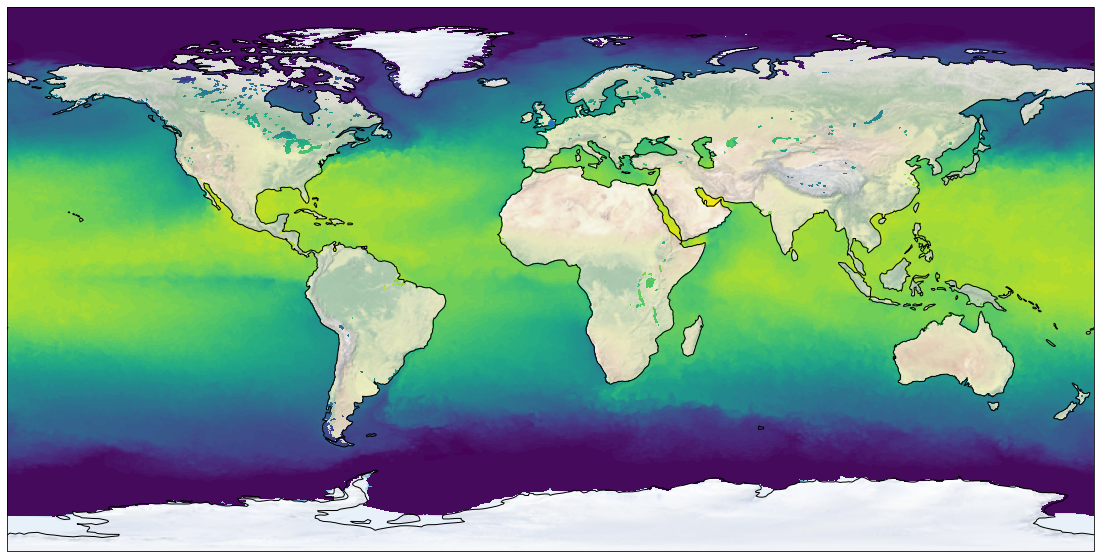

CPU times: user 20.4 s, sys: 1.78 s, total: 22.1 s
Wall time: 22.2 s


In [6]:
%%time
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_global()
ax.stock_img()

ax.plot(-0.08, 51.53, 'o', transform=ccrs.PlateCarree())
plt.contourf(lon, lat, var, 60, transform=ccrs.PlateCarree())
ax.coastlines()
plt.show()